In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [178]:
def regpol(w,z,n): 
    
       
    i = 0
    
    d = np.zeros([len(w),n+1])
    
    s = np.zeros(n+1)
    
    while i < n + 1:
        
        d[:,i] = pow(w.T,i)
        
        i += 1
        
    Q = np.matrix(d)
    
    H = np.dot(Q.T,Q)#H = (Q.T).dot(Q)
    
    H1 = H.I
    
    U = np.dot(Q.T,z)#U = (Q.T).dot(y)
    
    R = np.dot(H1,U.T)#R = H1.dot(U.T)
    
    R = R.reshape([1,n+1])
    
    k = 0
    
    while k < n + 1:
        
        s[k] = R[0,n - k]
        
        k += 1
    
    
    return s
      

In [179]:
def erro_ordem(a,b,p):
    
    i = 0
    
    bfit = np.zeros(8)
    
    bresid = np.zeros(8)
    
    while i < len(p):
        
        bfit = bfit + p[i]*pow(a,len(p)-i-1)
              
        i += 1
        
    bresid = b - bfit
    
    SQresid = sum(pow(bresid,2))
    
    return SQresid

In [180]:
dados = pd.read_csv('DadosTeste.csv')
frame = pd.DataFrame(dados)

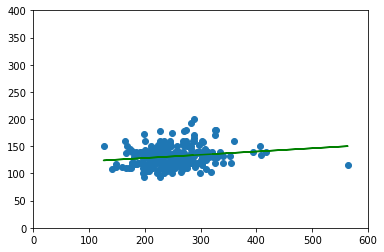

In [186]:
p = regpol(frame['serum cholestoral in mg/dl'],frame['resting blood pressure'],1)
plt.scatter(frame['serum cholestoral in mg/dl'], frame['resting blood pressure'])
plt.plot(frame['serum cholestoral in mg/dl'],np.polyval(p,frame['serum cholestoral in mg/dl']),'g-')
plt.axis([0,600,0,400])
plt.show()